# Praktikum 1
# Klasifikasi SVM dengan Data Dummy

In [3]:
# import library
import numpy as np  # linear algebra
import matplotlib.pyplot as plt # plotting
from scipy import stats # statistics
import seaborn as sns   # visualization

Kode diatas digunakan untuk mengimport library yang akan digunakan dalam program ini,
numpy digunakan untuk mengolah data numerik,
matplotlib digunakan untuk membuat plot grafik,
scipy digunakan untuk mengolah data statistik,
seaborn digunakan untuk membuat plot grafik.

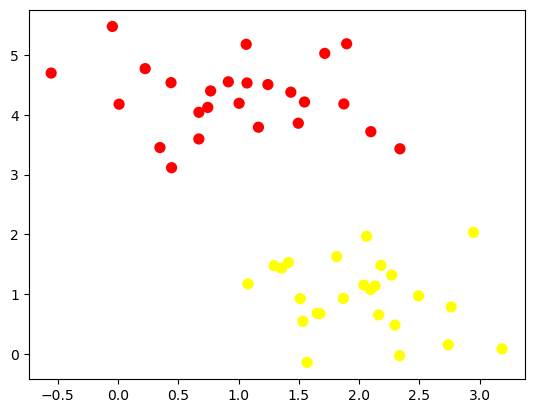

In [4]:
from sklearn.datasets import make_blobs # import make_blobs
X, y = make_blobs(n_samples=50, centers=2, # create a dataset
                  random_state=0, cluster_std=0.60) # with 50 samples, 2 centers, and a cluster standard deviation of 0.60
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # plot the data

code diatas digunakan untuk membuat data yang akan di klasterkan dengan menggunakan make_blobs
lalu data tersebut di plot dengan scatter plot
dan data tersebut di klasterkan dengan menggunakan 2 cluster
dan data tersebut di plot dengan scatter plot dengan warna yang berbeda

(-1.0, 3.5)

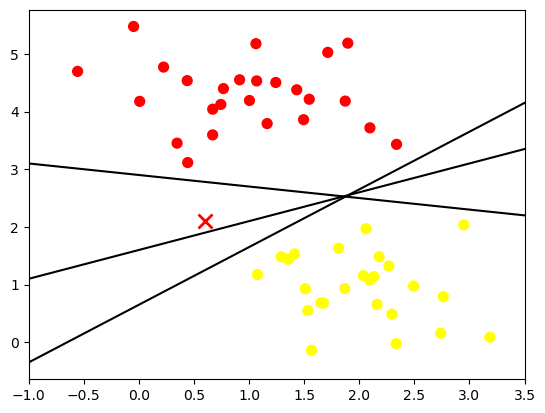

In [5]:
xfit = np.linspace(-1, 3.5) # create a line space from -1 to 3.5
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # plot the data
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10) # plot a point with x marker at (0.6, 2.1)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: # loop through the list of (m, b) pairs
    plt.plot(xfit, m * xfit + b, '-k') # plot the line y = mx + b

plt.xlim(-1, 3.5) # set the x-axis limit

code diatas digunakan untuk membuat plot data dan garis yang memisahkan data tersebut. Data yang digunakan adalah data yang telah dibuat sebelumnya dengan make_blobs. Garis yang digunakan untuk memisahkan data tersebut adalah garis dengan persamaan y = mx + b. Terdapat 3 garis yang digunakan untuk memisahkan data tersebut.

(-1.0, 3.5)

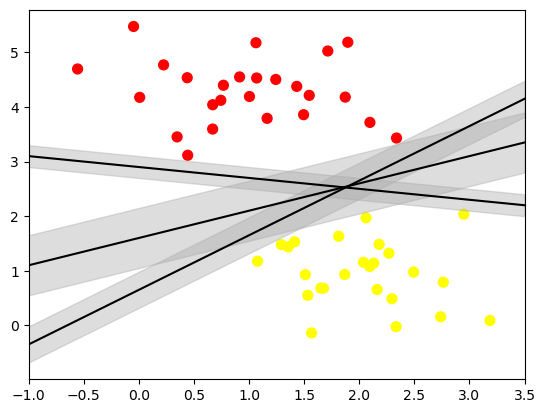

In [6]:
xfit = np.linspace(-1, 3.5) # create a line space from -1 to 3.5
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # plot the data

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: # loop through the list of (m, b, d) triplets
    yfit = m * xfit + b # calculate y = mx + b
    plt.plot(xfit, yfit, '-k') # plot the line y = mx + b
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', # fill the area between y = mx + b - d and y = mx + b + d
                     color='#AAAAAA', alpha=0.4) # with a light gray color

plt.xlim(-1, 3.5) # set the x-axis limit

Kode di atas membuat beberapa garis lurus dan area yang diarsir di sekitar garis lurus tersebut.
Garis-garis tersebut menunjukkan batas keputusan dari model klasifikasi yang dibuat.
Area yang diarsir menunjukkan ketidakpastian dari model klasifikasi tersebut.

# Penerappan fitting SVM

In [7]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10) # create a support vector classifier with a linear kernel
model.fit(X, y) # fit the model to the data

SVC(C=10000000000.0, kernel='linear')

Code diatas digunakan untuk membuat model Support Vector Classifier (SVC) dengan kernel linear dan parameter C=1E10
Lalu model tersebut di fit ke data yang sudah dibuat sebelumnya.

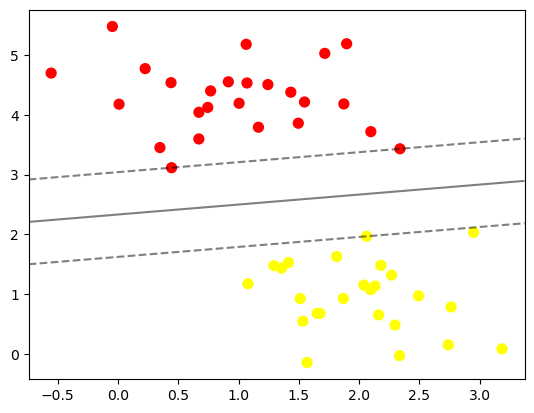

In [8]:
# buat sebuah fungsi untuk menampilkan fitting data
def plot_svc_decision_function(model, ax=None, plot_support=True): # define a function to plot the decision function of a 2D SVC
    
    if ax is None: # if no axis object is provided
        ax = plt.gca() # get the current axis object
    xlim = ax.get_xlim() # get the x-axis limits
    ylim = ax.get_ylim() # get the y-axis limits
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30) # create a grid of 30 x values between the x-axis limits
    y = np.linspace(ylim[0], ylim[1], 30) # create a grid of 30 y values between the y-axis limits
    Y, X = np.meshgrid(y, x) # create a meshgrid from the x and y values
    xy = np.vstack([X.ravel(), Y.ravel()]).T # stack the x and y values into a two-dimensional array
    P = model.decision_function(xy).reshape(X.shape) # evaluate the decision function on the grid
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',  # plot the decision boundary and margins
               levels=[-1, 0, 1], alpha=0.5, # at levels -1, 0, and 1
               linestyles=['--', '-', '--']) # with dashed lines for the margin and solid line for the boundary
    
    # plot support vectors
    if plot_support: # if plot_support is True
        ax.scatter(model.support_vectors_[:, 0],  # plot the support vectors
                   model.support_vectors_[:, 1],  # as red circles
                   s=300, linewidth=1, facecolors='none'); # with a size of 300 and a linewidth of 1
    ax.set_xlim(xlim) # set the x-axis limits
    ax.set_ylim(ylim) # set the y-axis limits
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # plot the data
plot_svc_decision_function(model) # plot the decision function of the model

Garis putus-putus adalah batas margin, garis solid adalah batas keputusan, dan titik-titik adalah support vector yang digunakan untuk menentukan batas margin dan batas keputusan, support vector adalah titik-titik yang berada di garis margin

In [9]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_ # get the support vectors

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Data yang berada di dalam support vector adalah data yang berada di sekitar garis pemisah antar kelas. Data ini merupakan data yang paling sulit untuk dipisahkan dari kelas lain.

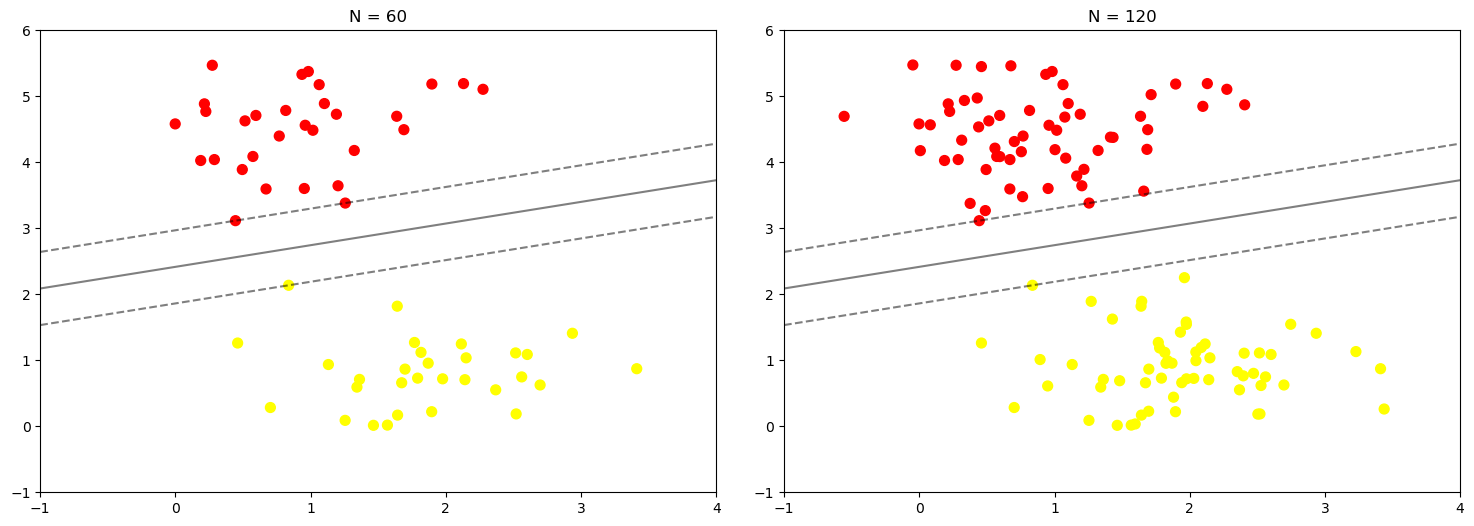

In [10]:
def plot_svm(N=10, ax=None): # define a function to plot the support vector machine for a dataset with N samples
    X, y = make_blobs(n_samples=200, centers=2, # create a dataset with 200 samples, 2 centers
                      random_state=0, cluster_std=0.60) # and a cluster standard deviation of 0.60
    X = X[:N] # take the first N samples
    y = y[:N] # take the first N labels
    model = SVC(kernel='linear', C=1E10) # create a support vector classifier with a linear kernel
    model.fit(X, y) # fit the model to the data
    
    ax = ax or plt.gca() # if no axis object is provided, get the current axis object
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # plot the data
    ax.set_xlim(-1, 4) # set the x-axis limits
    ax.set_ylim(-1, 6) # set the y-axis limits
    plot_svc_decision_function(model, ax) # plot the decision function of the model

fig, ax = plt.subplots(1, 2, figsize=(16, 6)) # create a figure and a subplot
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1) # adjust the figure
for axi, N in zip(ax, [60, 120]): # loop through the axes and the number of samples
    plot_svm(N, axi) # plot the support vector machine for
    axi.set_title('N = {0}'.format(N)) # set the title of the axis

Semakin banyak data yang digunakan, maka semakin banyak pula support vector yang digunakan

# Data Tidak Terpisah Secara Linier

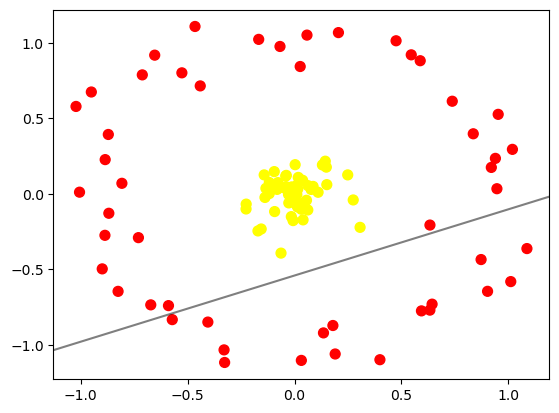

In [13]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles # import make_circles
X, y = make_circles(100, factor=.1, noise=.1) # create a dataset with 100 samples, a scale factor of 0.1, and a noise of 0.1

clf = SVC(kernel='linear').fit(X, y) # create a support vector classifier with a linear kernel and fit the model to the data

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # plot the data
plot_svc_decision_function(clf, plot_support=False); # plot the decision function of the model

Karena data tidak dapat dipisahkan secara linier, maka model yang dihasilkan juga tidak dapat memisahkan data dengan
baik. Hal ini disebabkan oleh penggunaan kernel linear pada model SVC.

In [14]:
r = np.exp(-(X ** 2).sum(1)) # calculate the radial basis function

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

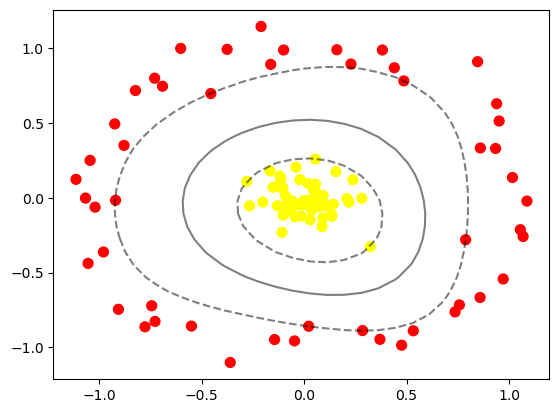

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.82351826,  0.71815781],
       [-0.09099108,  0.01311344],
       [-0.36100747, -1.10093278],
       [-0.05975621, -0.01954849],
       [-0.14464588, -0.9473939 ],
       [ 0.7361216 , -0.76265473],
       [ 0.93380025,  0.33021445],
       [-1.11348269,  0.12398658],
       [-0.45567567,  0.69788911],
       [ 0.21811832, -0.02842121],
       [-0.11431533,  0.11787864],
       [-0.10321239, -0.11561119],
       [ 0.95108869,  0.51403575],
       [-0.28007902,  0.11013195],
       [-0.11815767,  0.14521127],
       [-0.90659956, -0.74537338],
       [ 0.93890822,  0.62967117],
       [ 1.05468588, -0.21281243],
       [-0.04446523, -0.12662966],
       [ 0.06470532, -0.02193229],
       [-0.04707405, -0.95677477],
       [-0.00807549, -0.04641444],
       [-0.72803591, -0.82625675],
       [ 0.05216711,  0.05542199],
       [-1.02034566, -0.06215473],
       [ 0.09259168,  0.01583173],
       [ 0.28120426, -0.00276084],
       [

In [21]:
# import library
import numpy as np  # import numpy
import matplotlib.pyplot as plt # import matplotlib.pyplot
from sklearn.datasets import make_circles   # import make_circles
from mpl_toolkits import mplot3d    # import mplot3d
from ipywidgets import interact, fixed  # import interact and fixed

clf = SVC(kernel='rbf', C=1E6)  # create a support vector classifier with a radial basis function kernel
clf.fit(X, y)   # fit the model to the data

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # plot the data
plot_svc_decision_function(clf) # plot the decision function of the model
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], # plot the  support vectors
            s=300, lw=1, facecolors='none');    # as red circles

def plot_3D(elev=30, azim=30, X=X, y=y):    # define a function to plot the data in 3D
    ax = plt.subplot(projection='3d')   # create a 3D axis object
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')   # plot the data in 3D
    ax.view_init(elev=elev, azim=azim)  # set the elevation and azimuth of the view
    ax.set_xlabel('x')  # set the x-axis label
    ax.set_ylabel('y')  # set the y-axis label
    ax.set_zlabel('r')  # set the z-axis label
    
interact(plot_3D, elev=[-90, 90], azim=(-180, 180), X=fixed(X), y=fixed(y)) # create an interactive plot

Hasil dari program diatas adalah hasil dari plot data 3D yang dihasilkan dari data yang tidak terpisah secara linier. Pada data tersebut, terdapat dua lingkaran yang tidak dapat dipisahkan secara linier. Untuk memisahkan data tersebut, digunakan kernel rbf pada model SVC. Pada plot data 3D, terlihat bahwa data yang tidak terpisah secara linier dapat dipisahkan dengan menggunakan kernel rbf.

In [43]:
clf = SVC(kernel='rbf', C=1E6)  # Membuat model SVC dengan kernel rbf dan C yang besar
clf.fit(X, y)   # Melatih model

SVC(C=1000000.0)

Hasil dari program diatas adalah menampilkan data yang tidak terpisah secara linier dengan menggunakan kernel rbf.

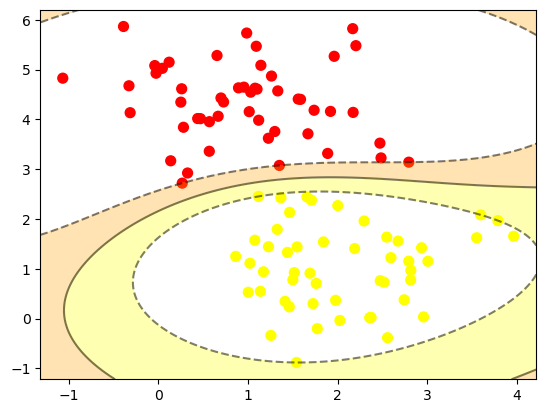

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # plot the data
plot_svc_decision_function(clf) # plot the decision function of the model
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], # plot the support vectors
            s=300, lw=1, facecolors='none') # as red circles

Hasil dari program tersebut adalah menampilkan data yang tidak terpisah secara linier dengan menggunakan kernel rbf. Pada hasil tersebut, data yang tidak terpisah secara linier dapat dipisahkan dengan menggunakan kernel rbf.

# Data Overlap

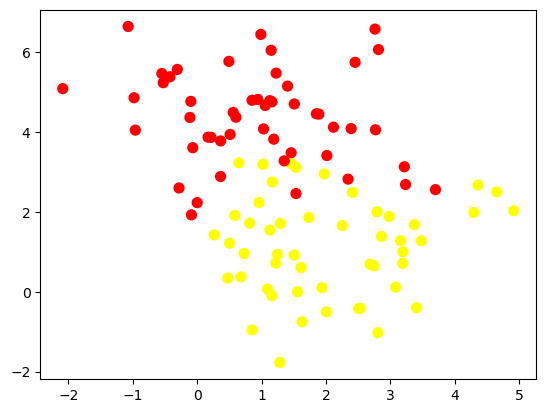

In [22]:
X, y = make_blobs(n_samples=100, centers=2, # create a dataset with 100 samples, 2 centers
                  random_state=0, cluster_std=1.2) # and a cluster standard deviation of 1.2
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'); # plot the data

Hasilnya menunjukkan bahwa data tidak dapat dipisahkan secara linier

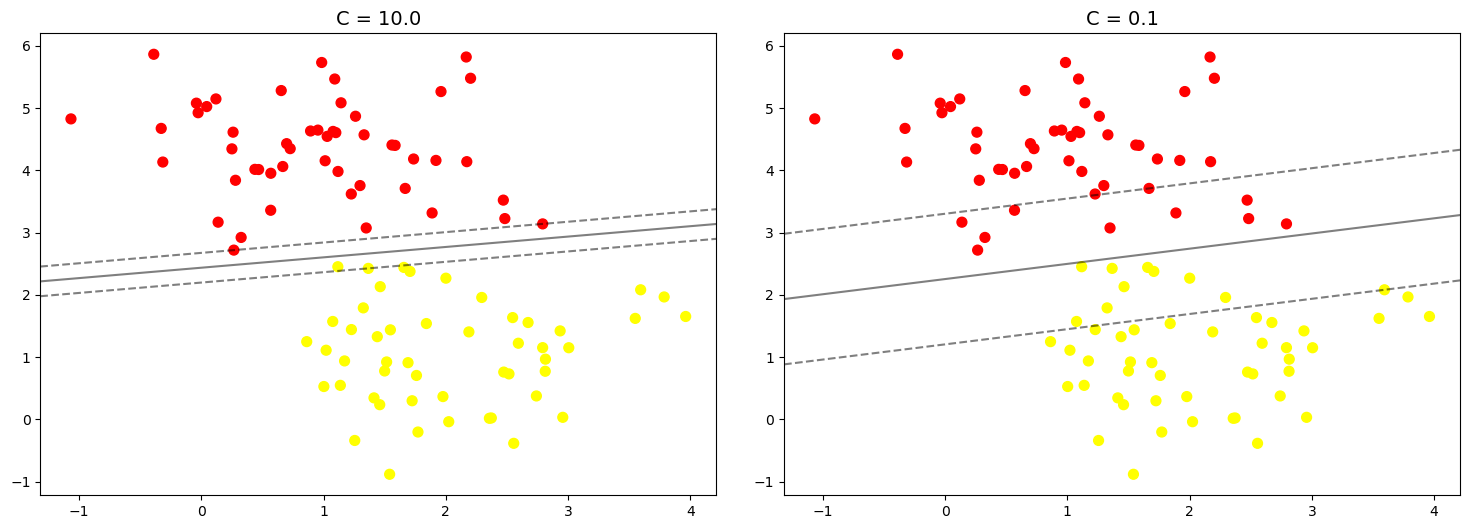

In [24]:
X, y = make_blobs(n_samples=100, centers=2, # create a dataset with 100 samples, 2 centers
                  random_state=0, cluster_std=0.8) # and a cluster standard deviation of 0.8

fig, ax = plt.subplots(1, 2, figsize=(16, 6)) # create a figure and a subplot
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1) # adjust the figure

for axi, C in zip(ax, [10.0, 0.1]): # loop through the axes and the values of C
    model = SVC(kernel='linear', C=C).fit(X, y) # create a support vector classifier with a linear kernel and the current value of C
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') # plot the data
    plot_svc_decision_function(model, axi)  # plot the decision function of the model
    axi.scatter(model.support_vectors_[:, 0], # plot the support vectors
                model.support_vectors_[:, 1],  # as red circles
                s=300, lw=1, facecolors='none'); # as red circles with a size of 300 and a linewidth of 1
    axi.set_title('C = {0:.1f}'.format(C), size=14) # set the title of the axis

Pada grafik di atas, terdapat dua plot yang menunjukkan hasil dari model SVM dengan kernel linear dan berbagai nilai C.
Pada grafik pertama, nilai C adalah 10.0. Pada grafik kedua, nilai C adalah 0.1.
Pada grafik pertama, nilai C yang besar menyebabkan margin yang lebih ketat dan lebih sedikit support vector.
Pada grafik kedua, nilai C yang kecil menyebabkan margin yang lebih lebar dan lebih banyak support vector.